I will be accessing the NSIDC snow cover extent data that has been regridded to a 25 km EASE-2.0 grid.

Reference: https://nsidc.org/data/nsidc-0046/versions/4

# Section 1: Data Access
- [x] Step 1: Download the data -- took close to 8 minutes to get the full record
- [x] Step 2: Download the reference grid

In [8]:
!wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies -r --keep-session-cookies --no-check-certificate --auth-no-challenge=on -r --reject "index.html*" -np -e robots=off https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/

--2024-10-21 14:53:18--  https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/
Resolving daacdata.apps.nsidc.org (daacdata.apps.nsidc.org)... 128.138.135.43
Connecting to daacdata.apps.nsidc.org (daacdata.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/index.html’

    [     <=>                               ] 1,099,648   1.12MB/s   in 0.9s   

2024-10-21 14:53:21 (1.12 MB/s) - ‘daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/index.html’ saved [1099648]

Removing daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/index.html since it should be rejected.

--2024-10-21 14:53:22--  https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/?C=N;O=D
Reusing existing connection to daacdata.apps.nsidc.org:443.
HTTP request sent, awaiting respon

In [8]:
!wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies -r --keep-session-cookies --no-check-certificate --auth-no-challenge=on -r --reject "index.html*" -np -e robots=off https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0772_easegrids_anc_grid_info/NSIDC0772_LatLon_EASE2_N25km_v1.0.nc

--2024-10-21 11:06:15--  https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0772_easegrids_anc_grid_info/NSIDC0772_LatLon_EASE2_N25km_v1.0.nc
Resolving daacdata.apps.nsidc.org (daacdata.apps.nsidc.org)... 128.138.135.43
Connecting to daacdata.apps.nsidc.org (daacdata.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4786927 (4.6M) [application/x-netcdf]
Saving to: ‘daacdata.apps.nsidc.org/pub/DATASETS/nsidc0772_easegrids_anc_grid_info/NSIDC0772_LatLon_EASE2_N25km_v1.0.nc’

100%[======================================>] 4,786,927   10.9MB/s   in 0.4s   

2024-10-21 11:06:17 (10.9 MB/s) - ‘daacdata.apps.nsidc.org/pub/DATASETS/nsidc0772_easegrids_anc_grid_info/NSIDC0772_LatLon_EASE2_N25km_v1.0.nc’ saved [4786927/4786927]

FINISHED --2024-10-21 11:06:17--
Total wall clock time: 1.8s
Downloaded: 1 files, 4.6M in 0.4s (10.9 MB/s)


- [x] Step 3: Parse the file names and ensure they are consistent with what we expect; extract dates from file names

In [1]:
import os
import numpy as np
import datetime as dt

data_loc = '/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/'

start_dates = []
end_dates = []
fnames = []

for fn in os.listdir(data_loc):

    grid = fn.split('.')[0].split('_')[0]
    resolution = fn.split('.')[0].split('_')[1]
    data_contained = fn.split('.')[1]
    timespan = fn.split('.')[2]
    version = fn.split('.')[3]

    # checking that file names match my expectation
    if ((grid == 'EASE2') and (resolution == 'N25km') and (data_contained == 'snowice') and (version == 'v04')):


        start = timespan.split('-')[0]
        end = timespan.split('-')[1]

        start_y, start_m, start_d = int(start[0:4]), int(start[4:6]), int(start[6:8])
        end_y, end_m, end_d = int(end[0:4]), int(end[4:6]), int(end[6:8])

        start_dates.append(dt.datetime(start_y, start_m, start_d))
        end_dates.append(dt.datetime(end_y, end_m, end_d))

        fnames.append(data_loc + fn)

In [12]:
print('First five filenames:', *fnames[:5], '...\n', sep='\n')
print('First five start dates:', *start_dates[:5], '...\n', sep='\n')
print('First five end dates:', *end_dates[:5], '...\n', sep='\n')


print('Last five filenames:', *fnames[-5:], '...\n', sep='\n')
print('Last five start dates:', *start_dates[-5:], '...\n', sep='\n')

First five filenames:
/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661003-19661009.v04.bin
/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661010-19661016.v04.bin
/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661017-19661023.v04.bin
/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661024-19661030.v04.bin
/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661031-19661106.v04.bin
...

First five start dates:
1966-10-03 00:00:00
1966-10-10 00:00:00
1966-10-17 00:00:00
1966-10-24 00:00:00
1966-10-31 00:00:00
...

First five end dates:
1966-10-09 00:00:00
19

# Import Packages

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from tqdm.auto import trange, tqdm
from dask.diagnostics import ProgressBar
import copy

import cartopy.crs as ccrs

# Section 2: Exploring the Data

- [x] Identify snow-covered grid cells and land 
- [x] Plot a snapshot of the data 
- [x] Create a mask that identifies Greenland, North America, and Eurasia

In [3]:
path_to_grid = '/users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0772_easegrids_anc_grid_info/NSIDC0772_LatLon_EASE2_N25km_v1.0.nc'

file in use: /users/jk/22/achereque/Paper2/L0_Reference/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0046_weekly_snow_seaice/data/EASE2_N25km.snowice.19661212-19661218.v04.bin


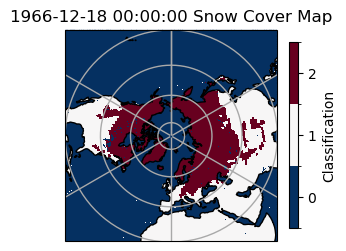

In [15]:
grid = xr.open_dataset(path_to_grid)

print('file in use:', fnames[10])
data = np.fromfile(fnames[10], dtype=np.dtype(np.uint8)).reshape((720, 720)) #open binary file

# assign values to snow/land/ocean
snow_array = np.where((0==data), 1, 0) # snow-free land
snow_array = np.where((5==data)|(1==data), 2, snow_array) # snow
snow_array = np.where((2==data)|(3==data), 0, snow_array) # sea ice --> ocean
snow_array = np.where((253==data)|(4==data)|(255==data), 0, snow_array) #ocean and sea ice

# add to the netcdf file with all the coordinate information
grid['data'] = (('y','x'), snow_array)

# plot
projection_of_data = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
fig, ax = plt.subplots(figsize=(3,3), subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(ccrs.PlateCarree(), color='darkgrey', linewidth=1)
levs = grid.data.plot(transform=projection_of_data, levels=[-0.5,0.5,1.5,2.5], add_colorbar=False)
plt.colorbar(levs, ax=ax, label='Classification', ticks=[0,1,2], fraction=0.04)
plt.title(str(end_dates[10])+' Snow Cover Map')
plt.show()

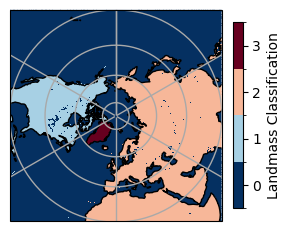

In [16]:
# Design a mask for North America, Greenland, and Eurasia.

a = copy.deepcopy(grid.data.values)
a = np.where((a>0), 1., 0.)

a[450:460,250:310] = 3*a[450:460,250:310]
a[415:450,250:350] = 3*a[415:450,250:350]
a[377:415,290:355] = 3*a[377:415,290:355]
a[400:415,280:290] = 3*a[400:415,280:290]
a[375:377,307:312] = 3*a[375:377,307:312]

final_lsmask = np.where(((grid.longitude.values>-25.)|(grid.longitude.values<-170.))&(a!=3), 2*a, a)

grid['lsmask'] = (('y','x'), final_lsmask)

projection_of_data = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
fig, ax = plt.subplots(figsize=(3,3), subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(ccrs.PlateCarree(), color='darkgrey', linewidth=1)
grid.lsmask.plot(transform=projection_of_data, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], cbar_kwargs={'label': 'Landmass Classification', 'fraction':0.04, 'ticks':[0,1,2,3]}, ax=ax)


# Section 3: Create a Dataset for the Snow Cover Data for Full Period

- [x] Merge all information into a single Dataset, including grid information and weekly snowcover

0it [00:00, ?it/s]

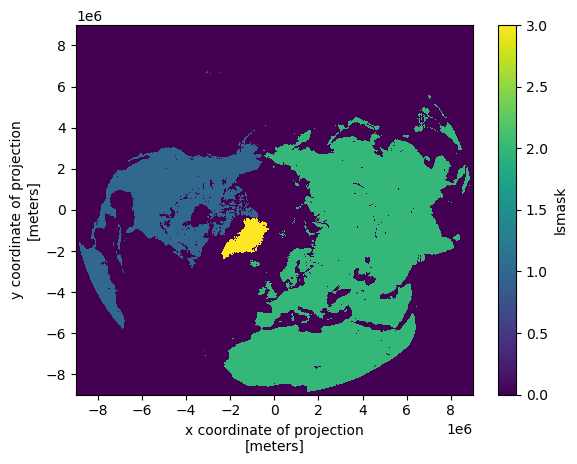

In [8]:
full_dataset = xr.open_dataset(path_to_grid)

#update title of Dataset becuase we are repurposing it
full_dataset.attrs['title'] = 'EASE2 Grid Information and NH Snow Cover at 25 km resolution.'

snow_stack = np.empty((len(end_dates), 720, 720), dtype=np.uint8)
for ni,nf in tqdm(enumerate(fnames)):
    data = np.fromfile(nf, dtype=np.dtype(np.uint8)).reshape((720, 720))

    # assign values to snow/land/ocean

    snow_array = np.where((0==data), 1, 0) # snow-free land
    snow_array = np.where((5==data)|(1==data), 2, snow_array) # snow
    snow_array = np.where((2==data)|(3==data), 0, snow_array) # sea ice --> ocean
    snow_array = np.where((253==data)|(4==data)|(255==data), 0, snow_array) #ocean and sea ice

    snow_stack[ni,:,:] = snow_array  

full_dataset.coords['time'] = ('time', end_dates)
full_dataset['land_ID'] = (('time', 'y', 'x'), snow_stack)
full_dataset['land_ID'].attrs = {'flag_values': '0 1 2',
                                 'flag_meanings': 'water_or_sea_ice land snow'}
    
a = copy.deepcopy(snow_array)
a = np.where((a>0), 1., 0.)

a[450:460,250:310] = 3*a[450:460,250:310]
a[415:450,250:350] = 3*a[415:450,250:350]
a[377:415,290:355] = 3*a[377:415,290:355]
a[400:415,280:290] = 3*a[400:415,280:290]
a[375:377,307:312] = 3*a[375:377,307:312]

final_lsmask = np.where(((full_dataset.longitude.values>-25.)|(full_dataset.longitude.values<-170.))&(a!=3), 2*a, a)

full_dataset['lsmask'] = (('y','x'), final_lsmask)

#full_dataset.to_netcdf('/users/jk/22/achereque/Paper2/L0_Reference/NSIDC_EASE2_N25km_v04.nc')

full_dataset['lsmask'].plot()

# Section 4: Compute Snow Cover Extent from Weekly Data

- [x] Compute snow cover extent from weekly data by summing all grid cells with snow cover and multiplying by grid cell area.
- [x] Add some attribute information and save, note chunking is helpful to avoid loading all data into memory

In [5]:
def calc_NOAA_snow_area(lmm, save_file=False):

    #load data
    full_dataset = xr.open_dataset('/users/jk/22/achereque/Paper2/L0_Reference/NSIDC_EASE2_N25km_v04.nc', chunks={'time':10*52})

    lmm_string = f'{lmm[0]}_{lmm[1]}N'

    #calculate continental-scale snow cover
    snow_area_km2 = xr.Dataset()

    snow_area_km2['NAm'] = xr.where((full_dataset.land_ID==2)&(full_dataset.latitude<=lmm[1])&(full_dataset.latitude>=lmm[0])&(full_dataset.lsmask==1), 1, 0).sum(('x','y')) * 25 * 25
    snow_area_km2['NAm'].attrs = {'units':'km2'}

    snow_area_km2['Eur'] = xr.where((full_dataset.land_ID==2)&(full_dataset.latitude<=lmm[1])&(full_dataset.latitude>=lmm[0])&(full_dataset.lsmask==2), 1, 0).sum(('x','y')) * 25 * 25
    snow_area_km2['Eur'].attrs = {'units':'km2'}

    snow_area_km2['Greenland'] = xr.where((full_dataset.land_ID==2)&(full_dataset.latitude<=lmm[1])&(full_dataset.latitude>=lmm[0])&(full_dataset.lsmask==3), 1, 0).sum(('x','y')) * 25 * 25
    snow_area_km2['Greenland'].attrs = {'units':'km2'}

    snow_area_km2.attrs = {'title': 'Snow area in km^2 based on NSIDC_EASE2_N25km_v04.nc'}

    if save_file:
        #save to netcdf
        with ProgressBar():
            snow_area_km2.to_netcdf(f'/users/jk/22/achereque/Paper2/L0_Reference/NSIDC_SCE.weekly.{lmm_string}.nc')
        full_dataset.close()
    else:
        return snow_area_km2


calc_NOAA_snow_area([40,90], save_file=True)

[                                        ] | 0% Completed | 382.34 us

[########################################] | 100% Completed | 11.41 ss


## Comparison with old version

- [x] Plot mean October snow cover extent and compare to the data I have been using [(src)](https://climate.rutgers.edu/snowcover/table_area.php?ui_set=2&ui_sort=0).

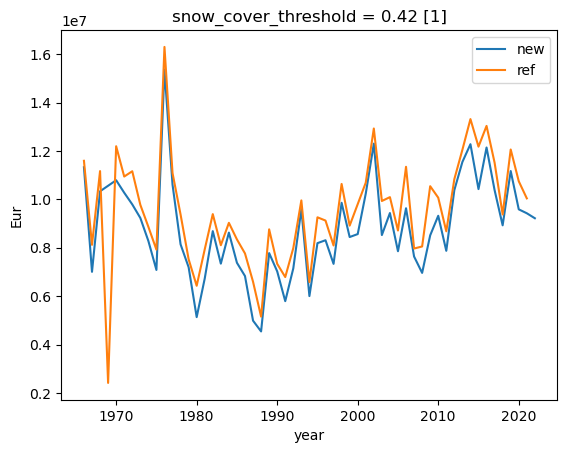

In [23]:
ref_NOAA = xr.open_dataset('/users/jk/22/achereque/Paper2/SnowCoverAnalysis/ref_NOAA_data.nc')
weekly_data = xr.open_dataset('/users/jk/22/achereque/Paper2/L0_Reference/NSIDC_SCE.weekly.40_90N.nc')

(weekly_data['Eur']).sel(time=weekly_data.time.dt.month.isin([10]), drop=True).groupby('time.year').mean().plot(label='new')
ref_NOAA['Eur'].plot(label='ref')

plt.legend()
weekly_data.close()

# Section 5: Weighting for "NOAA-like resampling"
- [x] Calculate weights for all months to facilitate NOAA-like resampling
- [x] Write the NOAA-like resampling code that takes a general Dataset or DataArray and returns time-averaged data

In [26]:
mname = dict(zip(range(1, 13), ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
inv_mname = dict(zip(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], range(1, 13)))

weekly_data = xr.open_dataset('L0_Reference/NSIDC_SCE.weekly.40_90N.nc')

weight_ds = xr.Dataset()
weight_ds['time'] = weekly_data.time

for month in range(1, 13):
    date_subset = weekly_data.time.sel(time = weekly_data.time.dt.month.isin([month, month+1]))

    weights = np.zeros(len(date_subset.values))
    for n,i in enumerate(date_subset.indexes['time']):
        #print(i)
        if (i.month == month) & ((i-dt.timedelta(days=6)).month == month):
            weights[n] = 7 #full week falls in month
        elif (i.month != month) & ((i-dt.timedelta(days=6)).month == month):
            weights[n] = 7-i.day #partial week end of month
        elif (i.month == month) & ((i-dt.timedelta(days=6)).month == month-1) & (month != 1):
            weights[n] = i.day #partial week beginning of month
        elif (i.month == 1) & ((i-dt.timedelta(days=6)).month == 12):
            weights[n] = i.day #partial week beginning of month
        else: 
            weights[n] = 0 #full week not in month
            
    weight_ds[mname[month]] = xr.DataArray(data = weights, coords={'time':date_subset}, dims='time')
    
weight_ds.to_netcdf('L0_Reference/NOAA_like.weekly_weights.nc')


- [x] subsample_weight_and_timeav_like_NOAA --> Move function to utils.py so other scripts can use it

```python
def subsample_weight_and_timeav_like_NOAA(indata, month, ylim = [1980, 2020]):
    '''Apply weighting to weekly input data to average only over the NOAA dates to yeild monthly data.

    Parameters
    ----------
    indata : xr.DataArray or xr.Dataset
        input data
    month : int or str
        month of interest
    ylim : list
        year limits to apply weighting from August ymin to July ymax. Default is [1980, 2020].
    '''
    mname = dict(zip(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
    inv_mname = dict(zip(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], range(1, 13)))

    ### Load weekly weighting data
    weight_ds = xr.open_dataset('/users/jk/20/achereque/SnowProjects2/src/Snow_Cover_Analysis/NOAA_like.weekly_weights.nc')
    
    ### Decode month and select it from weight_ds
    if type(month) == str:
        m_weights = weight_ds[month].dropna(dim='time')
        month_convert_num = inv_mname[month]
    elif type(month) == int:
        m_weights = weight_ds[mname[month]].dropna(dim='time')
        month_convert_num = month
    else:
        raise ValueError('month must be int or str')

    ### Compute weights for month so they sum to 1
    m_weights['start_year'] = (('time'), [i.dt.year-1 if i.dt.month < 8 else i.dt.year for i in m_weights.time])

    m_weights = m_weights.groupby('start_year') / m_weights.groupby('start_year').sum() 

    lower_lim = (m_weights.time.dt.year>ylim[0])|((m_weights.time.dt.month>=8)&(m_weights.time.dt.year==ylim[0]))
    upper_lim = (m_weights.time.dt.year<ylim[1])|((m_weights.time.dt.month<8)&(m_weights.time.dt.year==ylim[1]))

    m_weights = m_weights.where(upper_lim & lower_lim, drop=True).drop('start_year')
    
    m_weights['time'] = m_weights.time.indexes['time']
    
    subset_indata = indata.sel(time=indata.time.dt.date.isin(m_weights.time.dt.date), drop=True)
    weighted_data = (subset_indata * m_weights).resample(time='AS-AUG').sum(dim='time')

    weighted_data = weighted_data.assign_coords(time=weighted_data.time.dt.year).rename({'time':'year'})

    if month < 8:
        weighted_data = weighted_data.assign_coords(year=weighted_data.year+1)

    weight_ds.close()

    return weighted_data
    
    ```